---
>「団結は強さだ… チームワークとコラボレーションがあれば、すごいことが成し遂げられる。」
>
> Mattie Stepanek
---

# 連合学習が生まれた背景

AIには大量のデータが必要であるが、データを集めるには様々な障害がある
- 契約上の問題
  - 契約で情報の二次配布ができないなど
- プライバシの問題
  - 学習に用いるデータに個人を特定可能な情報が含まれている場合、オプトインを取得するなど容易に利用することができない
- 通信・ストレージの問題
  - データを大量にかつ一か所に集めるには、それに見合ったストレージ量や通信容量が必要
- 規制
  - General Data Protection Regulation （GDPR）  
  一般データ保護規則
  - California Consumer Privacy Act of 2018（CCPA）  
  カリフォルニア州消費者プライバシ法
  - 様々な規制が提示されている

これらを解決するためには、プライバシを確保しながら分断されたデータでも利用可能な機械学習方法が必要である

# 連合学習(Federated Learning)とは

複数のデータ所有者が協力して1つの機械学習モデルを構築することを一般に連合学習と呼ぶ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/flfig.png" width=500>

以下のような特徴・必要事項がある
- 参加者の生データそのものは交換しない
  - 連合学習に参加し、他の参加者が所有するデータを復元することが困難
  - 生データそのものが交換されれば、それぞれ独立したモデルの融合となる
- 参加者自身が所有するデータのみで学習させるモデルよりも連合学習の方が高くなる
  - ローカルのみの方が高性能であれば連合学習は不要である
- モデルの性能はすべてのデータを集約した際の性能に近くなる
  - 連合学習の方が高性能ならデータを集約する必要はない

なお、連合学習の他、モデルを分割する分散学習も存在し、それらの特徴は、情報通信ネットワークを用いて、学習の計算過程やパラメータ更新などを交換することである
- 従って、クライアント・サーバモデルを前提とする場合が多い
  - 様々なリモートで情報を交換するため、セキュリティ上の問題が発生する
    - サーバが公開してはならないクライアントの情報を公開する
    - クライアントが粗悪な学習を行った結果、全体の性能も低下する



# セキュリティ

機械学習のセキュリティは大きく２つの考え方がある

- セキュア機械学習  
攻撃者は機械学習システムを破壊する
  - 整合性：モデルの出力を改変し誤った出力とする
  - 可用性：モデルパラメータを使用できないレベルに改変する
- プライバシ保護機械学習(連合学習のターゲット)  
  攻撃者は機械学習システムのプライバシを侵害する
  - プライバシ：データ提供者の個人情報を特定する
  - 機密性：モデル情報を流出させる


## MLに関連するセキュリティ

MLに関連するセキュリティについて、連合学習とは少し観点が異なるが、ここでまとめておく

|  | プライバシ保護ML | セキュアML |
| :---: | :--- | :--- |
| セキュリティ違反 | - プライバシ | - 整合性 |
|  | - 機密性 | - 可用性 |
| 攻撃 | - 再構築攻撃 | - モデルポイズニング攻撃 |
|  | - モデル反転攻撃 | - 敵対的攻撃 |
|  | - メンバーシップ推論攻撃 | - 中間者攻撃 |
| 防御手法 | - MPC | - 防御的蒸留 |
|  | - 準同型暗号 | - 敵対的学習 |
|  | - 差分プライバシ | - 正則化 |


- 再構築攻撃: ランダムに初期化した乱数データを入力して勾配情報を獲得、勾配を基に窃取したいデータが属するクラスに対する入力データの誤差が小さくなる方向に入力データを変更することで特定に近づける
- モデル反転攻撃: モデルの入力と出力を反転させる手法で、モデルが入手できている場合は直接勾配降下法で入力データ特定に向けた最適化が可能
- メンバーシップ推論攻撃: 学習データ分布を予測し、「学習データに含まれていると思われるデータ」と「含まれていないと思われるデータ」を用意、その分類スコアを獲得、さらにそのスコアを入力としてメンバーかどうかを独自に構築した攻撃用ネットワークで学習させることで、どのような分類の入力が利用されたかを特定する
- モデルポイズニング攻撃: モデルが誤った推論を行うように、誤った入力を投入させる
- 敵対的攻撃: 本来のデータと区別がつきにくい敵対例に対して、正しいデータが獲得できないようなデータを提示することで、その解決法としてReLUのような微分不可能な点を含まない活性化関数を利用することが挙げられている

<img src="http://class.west.sd.keio.ac.jp/dataai/text/adversarial_example.png" width=500>

- MPC(Multi-party Computation): 複数人感での通信
- 準同型暗号: 暗号化したまま計算や検索ができる暗号化方式
- 差分プライバシ: ある個人のデータを含むデータセットについて、それと隣接(ある特定の部分しか違わない)データセットと区別できないようにデータを加工する匿名化手法で、一般にデータにラプラスノイズを加えて(ラプラスメカニズム)匿名化する
- 防御的蒸留: 学習済みモデルの入力と出力をよりシンプルなアーキテクチャを持ったモデルで学習させて比較する
- 敵対的学習: 正しいラベルと紐づけた敵対的サンプルを学習データに加えて学習を行う防御手法
- 正則化: 情報を追加する、ペナルティを与えるなどした情報の加工により過学習を防ぐ

その他、勾配マスキングと呼ばれる、学習時に入力データに対する微分値を最小化（難読化）することで、敵対的サンプルの効果を低減させる防御手法がある

## 攻撃について

### 想定される攻撃者像

- 正直者  
基本的に無害
- “semi-honest”, “honest-but-curious”, “半正直”な攻撃者  
  - プロトコルやルールは守る
  - 自身が取得できない情報を不正に知ろうとする
- 悪意のある攻撃者
  - プロトコルやルールから逸脱する
  - システム破壊を試みる

### 機械学習システムへのプライバシ脅威モデル
- 再構築攻撃
  - 学習や推論時に生データや特徴ベクトルを再構築  
ex. 勾配情報から学習データを復元
- モデル反転攻撃  
  - 様々なデータをモデルに入力して学習データやモデル構造を再構築する
- メンバーシップ推論攻撃
  - 特定の標本が学習データに含まれているかを調べる
- 属性推論攻撃
  - 公開データの中から個人(標本)を識別することで、個人の属性を入手する
    - 強力な背景知識があれば匿名化されていても個人を特定可能となる場合がある
- モデルポイズニング攻撃
  - 学習処理を解析、攻撃してモデルの更新をコントロールする
    - ex. 自分の更新だけ強く反映させる
  - 連合学習は特にこの点での脆弱性に対する対応が必要となる

# 分散深層学習

連合学習は、通信ネットワークなどを介して、異なる場所で学習モデルを統一する仕組みであるが、これは、より広い、「分散深層学習」の一部とみなすことができる

例えば、大きなニューラルネットワークを通信ネットワークをつなげて複数のホストで扱うなども可能であり、これらをまとめて分散深層学習と呼ぶ

なお、推論時の分散は容易であるが、学習時の分散は、誤差逆伝播の仕組みもネットワークを介して行われるため、より複雑になる
- 通信コストも大きくなり、導入メリットが得にくい形態である

## 分散機械学習の目的

スケーラビリティの獲得

- 機械学習をスケールさせる
  - 大規模化しても性能が追従して向上してほしい
- 分散処理
  - メモリ不足に対応する
- データを水平分割し複数ノードで同時に並列して学習を行う
  - 学習時間を短縮する
- プライバシ保護
  - データ所有者がデータ公開を望まない
- データ公開ではない方法で協調し学習を達成したい
  - 分散処理


## 対応手法
- データ並列
  - 巨大な学習データを水平分割し並列学習を行う
- ノード間の学習を集約する
  - モデル並列
    - 巨大なモデルを分割し複数GPUを利用して学習する
    - パイプライン化してスループットを向上させる
- グラフ並列
  - Graph Neural Network(GNN)について並列化する
    - データの関連をネットワークで表現したグラフデータに深層学習を取り入れたモデル
    - RNNはunfoldして直列につながったGNNとみなすことができ、これをより複雑なネットワークにする
    - グラフとしての入力データからデータグループ間の結合を獲得して学習を進める
- タスク並列
  - タスクを分割して並列実行する
  - 複数GPUやGPU・CPU協調など



プライバシ保護が目的の分散機械学習

何を秘匿したいのか（どれか，もしくは全部）
入力の学習データ
出力の予測ラベル
モデル情報
メタデータ（データと所有者の関係性とか）
データの分割
水平分割
標本は異なるが，属性は同じ
ex. 全ての参加者が同じビジネスをしている
垂直分割
標本は同じだが，属性が異なる
ex. 参加者は異なるビジネスをしている



## プライバシ保護分散機械学習技術

- 匿名化
  - 差分プライバシなどで匿名化されたデータを使用する
    - 比較的実装が容易
    - データのみ匿名化される
    - 匿名化によりモデル性能が低下する
- 秘密計算による暗号化
  - 秘密計算などを用いて分散機械学習を行う
  - 計算効率が低下する
- プライバシ保護勾配降下法
  - 代数的アプローチ
    - 行列計算の代数的性質を利用する
    - その内容は秘密計算に近しい
  - 疎な勾配更新
    - 勾配の一部のみを共有する
  - 勾配を通信する際に差分プライバシを施す
  - 勾配を量子化する
- Naïveな連合学習
  - FedAvg

すべての問題を解決する手法はなく次の点でトレードオフとなる
- モデル性能
- 計算コスト
- 通信コスト



# Naïveな連合学習

FedAvgがもっともよく知られている

- 想定環境
  - データが水平に分割されている
  - 全ての参加者で同じタスクを行う
- FedAvgの方法
  - 参加者がそれぞれのモデルとデータでモデルの更新を行う
  - 参加者は勾配(モデルの更新情報)をコーディネータ(サーバ)に送る
  - コーディネータは集約した勾配もしくはモデルの加重平均を用いてグローバルモデルを更新する
  - コーディネータはグローバルモデルを参加者に配布する
  - 上記を繰り返す

- FedAvgにおけるプライバシの定義
  - 参加者が保持する生データが開示されなければ良い
    - ただし、勾配から生データ情報をおおよそ復元可能であることが実証されている
  - コーディネータは不正をしない
    - 実際にはコーディネータが攻撃者になり勾配を公開する可能性が否定できない



# 水平連合学習

<img src="http://class.west.sd.keio.ac.jp/dataai/text/DataDistribution_Horizontal.png" width=300>

- 特徴
  - データが水平に分割される
    - 赤い部分が水平に区切られる
  - 標本は異なるが、属性は同じ

- 具体例(次ような場合)
  - 参加者は地方銀行で似たカラムのDBを保持
  - 参加者はそれぞれの地域でサービスを提供
  - サービスの利用者(標本)は異なる

- 水平連合学習のアルゴリズム
  - 先述のFedAvg
  - サーバクライアント型の連合学習
  - FedAvgでは何を平均化するのか？
    - モデル平均も勾配平均も両方ともFedAvgと呼ばれる
    - 参加者間でモデル初期値が同じであり、ローカルモデルの更新が行われると必ずモデル集約が行われる場合は、モデル平均と勾配平均が等価となる

- 水平連合学習の課題
  - 設計者がデータを見ることができない（これはメリットでもある）
  - クライアントのデータが秘匿されているのでテスト環境を用意するのが難しい
  - ハイパーパラメータのチューニングのためなどに何回も実験することが困難
  - 参加者集める方法の検討が必要
  - 参加者が同じビジネスをしている場合は競合と協力することになるため契約上の問題が発生する可能性がある
  - インセンティブ設計が必要
  - 参加者の不正行為を防ぐ手法が必要


-- 垂直連合学習

<img src="http://class.west.sd.keio.ac.jp/dataai/text/DataDistribution_Vertical.png" width=300>

- 特徴
  - データが垂直に分割される
  - 標本は同じであるが、属性は異なる

- 具体例(次のような場合)
  - 参加者は銀行と小売店で保持しているDBのカラムは異なる
  - 同じ個人がそれぞれのサービスを利用
  - 標本は同じ

- 垂直連合学習のアルゴリズム
  - 連合線形回帰
    - 連合学習で線形回帰を実現
  - 準同型暗号を使用して参加者が保有するデータのプライバシを守る
    - SecureBoost
  - 連合学習でGBDTを実現
      - GBDTとはGradient(勾配)、Boosting(ブースティング) 、Decision(決定)、Tree(決定木であるDicision Tree)を組み合わせた手法のこと

- 垂直連合学習の課題
  - 参加者の相互依存が大きい
  - 学習の途中で中間結果をやり取りすることが多い
  - 参加者ごとに持っているデータの属性が異なる
    - 参加者の離脱により連合学習が破綻しうる
    - 耐障害性が大事

連合学習のプライバシ保護や攻撃に関する研究のほとんどが水平連合学習である

# Federated Optimization（連合最適化）

次のような分散最適化がある
- Non-IID: ユーザごとに持つデータの分布が異なる
- Unbalanced: ユーザによってデータ量が異なる
- Massively distributed:ユーザ数に比べて、ユーザごとのサンプルサイズが極めて少ない場合
- Limited communication: 通信量を削減する

## Personalized Federated Learning

- モデルをクライアントごとにPersonalizeする
- クライアント間のデータ分布の差異に対応
- さまざまな手法が提案されている
  - MAML問題の分散型手法
  - ヘッセ行列を近似する
  - モデルを組み合わせる手法
  - 共有部分とPersonalize部分に分けてそれぞれ学習させる手法
  - グローバルな部分をFedAvg，ローカルな部分をローカルで学習させる手法
  - 各クライアントがローカルな特徴抽出器とグローバルな出力を持つ手法
  - グローバルモデルとローカルモデルを異なる正則化で学習させる手法
  - データ分布が似ているクライクライアントをグループ化する手法
  - データ分布が近いクライアント同士で連携する手法

Federated Learning(FL)を実際に実装する

- 上記のように、通信ライブラリを用いた実際に近いモデルとなっているが、Colabのmultiprocessingでは、CUDA環境（GPU）を複数プロセスで実行することができない
  - 親プロセスですでに CUDA (GPU) が初期化されている場合、子プロセスから CUDA を利用しようとするとこのエラーが発生
- 対策として、Notebook 環境で spawn 方式に変更するのは関数の pickling (直列化) の問題で難易度が高いため、シミュレーション全体を CPU で実行するようにしている


In [1]:
import copy
from logging import Formatter, StreamHandler, getLogger
import os
import random
from typing import Dict, List

import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset
import torchvision
import torchvision.transforms as transforms

パラメータを設定する

In [2]:
config = {
    "batch_size": 128,
    "device": "cpu",  # multiprocessingでのエラー回避のためCPUに変更
    "epochs": 5,
    "learning_rate": 0.0001,
    "num_clients": 5,
    "rounds": 5,
    "seed": 42,
}

ログの取得および乱数のシードに関する設定を行う

In [3]:
def get_logger(name="EXP"):
    log_fmt = Formatter(f"%(asctime)s [{name}][%(levelname)s] %(message)s ")
    logger = getLogger(__name__)
    handler = StreamHandler()
    handler.setLevel("INFO")
    handler.setFormatter(log_fmt)
    logger.setLevel("INFO")
    logger.addHandler(handler)
    logger.propagate = False
    return logger

def seed_everything(seed=1234):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

専用のデータローダを設定する

In [4]:
class FedAvgRetriever():
    def __init__(self, config: Dict) -> None:
        self.config = config

        # init CIFAR-10
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        self.train_set = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform)
        self.test_set = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform)

    def get(self, num_clients: int) -> List[Dict[str, DataLoader]]:
        train_size = len(self.train_set) // num_clients
        test_size = len(self.test_set) // num_clients

        dataloaders = []
        for i in range(num_clients):
            train_idx = range(i * train_size, (i + 1) * train_size)
            test_idx = range(i * test_size, (i + 1) * test_size)

            train_set = Subset(self.train_set, train_idx)
            test_set = Subset(self.test_set, test_idx)

            # num_workers=0 is safer for multiprocessing in this simple script
            train_loader = DataLoader(
                train_set, batch_size=self.config["batch_size"], shuffle=True, num_workers=0)
            test_loader = DataLoader(
                test_set, batch_size=self.config["batch_size"], shuffle=False, num_workers=0)
            dataloaders.append({
                "train": train_loader,
                "test": test_loader
            })

        return dataloaders

シンプルなMNISTの分類モデルを記述する

ここでは精度は問わずシンプルな設計とするが、なるべく実際の通信や処理を再現する

- 通信プロトコルの利用: socket ライブラリを使用し、TCP/IP でモデルパラメータ（重みとバイアス）を送受信する
- マルチプロセス化: multiprocessing を使用し、サーバと複数のクライアントを独立したプロセスとして起動する

その他、以下の点に注意している

- データローダの修正: マルチプロセス化において、DataLoader の num_workersの値はフォーク時のエラーを防ぐようにしている
- Aggregationにおいて、重みの更新にバイアスの集約も含める必要があり、この点に留意している

以上により、実際の分散学習に近い環境（各クライアントが独立して計算し、ネットワーク越しにパラメータを交換する）を再現している

In [5]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)

        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 128, 3)

        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)

        x_size = x.size()
        x = x.reshape(x_size[0], -1, x_size[2] ** 2).mean(2)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

クライアントモデルを記述する

In [6]:
import socket
import pickle
import struct
import time
from typing import Dict, List
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

# --- Socket Helper Functions ---
def send_msg(sock, msg):
    msg_pickle = pickle.dumps(msg)
    sock.sendall(struct.pack('>I', len(msg_pickle)))
    sock.sendall(msg_pickle)

def recv_msg(sock):
    raw_msglen = recvall(sock, 4)
    if not raw_msglen: return None
    msglen = struct.unpack('>I', raw_msglen)[0]
    return pickle.loads(recvall(sock, msglen))

def recvall(sock, n):
    data = b''
    while len(data) < n:
        packet = sock.recv(n - len(data))
        if not packet: return None
        data += packet
    return data
# -------------------------------

class FedAvgClient():
    def __init__(self, config: Dict, dataloaders: Dict[str, DataLoader], host='localhost', port=5000) -> None:
        self.config = config
        self.train_loader = dataloaders["train"]
        self.test_loader = dataloaders["test"]
        self.host = host
        self.port = port
        # Logger is created in run() to avoid pickling issues
        self.model = None

    def _train_loop(self, device, logger):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(),
                               lr=self.config["learning_rate"])

        epoch_losses = []
        self.model.train()
        for epoch in range(self.config["epochs"]):
            running_loss = 0.0
            for i, (X, y) in enumerate(self.train_loader):
                X, y = X.to(device), y.to(device)
                optimizer.zero_grad()
                outputs = self.model(X)
                loss = criterion(outputs, y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            avg_loss = running_loss / len(self.train_loader)
            epoch_losses.append(avg_loss)
            logger.info(f"Epoch {epoch}: Loss {avg_loss:.4f}")
        return epoch_losses

    def run(self, client_id):
        logger = get_logger(f"Client-{client_id}")
        device = torch.device(self.config["device"])

        # Initialize model architecture
        self.model = CNNModel().to(device)

        # Connect to Server
        while True:
            try:
                s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
                s.connect((self.host, self.port))
                logger.info(f"Connected to server at {self.host}:{self.port}")
                break
            except ConnectionRefusedError:
                time.sleep(1)
                continue

        try:
            while True:
                msg = recv_msg(s)
                if msg is None: break

                if msg['type'] == 'TRAIN':
                    logger.info("Received Global Model. Starting Local Training...")
                    # Load global weights
                    self.model.load_state_dict(msg['weights'])
                    self.model.to(device)

                    # Train and collect losses
                    losses = self._train_loop(device, logger)

                    # Send back local weights (CPU) and losses
                    local_weights = {k: v.cpu() for k, v in self.model.state_dict().items()}

                    response = {
                        'weights': local_weights,
                        'client_id': client_id,
                        'losses': losses
                    }
                    send_msg(s, response)
                    logger.info("Sent Local Model Update")

                elif msg['type'] == 'STOP':
                    logger.info("Received STOP signal. Exiting.")
                    break
        finally:
            s.close()

サーバ側を記述する
- モデルのパラメータを取得し、その平均をとって配布する
- モデルパラメータの取得と設定はすでに学んだ方法である

In [7]:
import socket
import pickle
import torch
import os
from typing import Dict

# --- Helper functions needed for Server as well ---
def send_msg(sock, msg):
    msg_pickle = pickle.dumps(msg)
    sock.sendall(struct.pack('>I', len(msg_pickle)))
    sock.sendall(msg_pickle)

def recv_msg(sock):
    raw_msglen = recvall(sock, 4)
    if not raw_msglen: return None
    msglen = struct.unpack('>I', raw_msglen)[0]
    return pickle.loads(recvall(sock, msglen))

def recvall(sock, n):
    data = b''
    while len(data) < n:
        packet = sock.recv(n - len(data))
        if not packet: return None
        data += packet
    return data
# ------------------------------------------------

class FedAvgServer():
    def __init__(self, config: Dict, host='localhost', port=5000) -> None:
        self.config = config
        self.host = host
        self.port = port
        self.global_model = CNNModel() # CPU initially
        self.history = {} # Store loss history: {client_id: [loss...]}

    def aggregate(self, local_weights_list):
        if not local_weights_list: return
        global_dict = self.global_model.state_dict()
        for key in global_dict.keys():
            # Stack and sum parameters from all clients
            params_sum = torch.stack([w[key] for w in local_weights_list], dim=0).sum(dim=0)
            # Average
            global_dict[key] = params_sum / len(local_weights_list)
        self.global_model.load_state_dict(global_dict)

    def run(self):
        logger = get_logger("Server")
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        s.bind((self.host, self.port))
        s.listen(self.config["num_clients"])
        logger.info(f"Server listening on {self.host}:{self.port}")

        client_conns = []
        try:
            # Establish connections
            for _ in range(self.config["num_clients"]):
                conn, addr = s.accept()
                logger.info(f"Client connected from {addr}")
                client_conns.append(conn)

            # Training Rounds
            for round in range(self.config["rounds"]):
                logger.info(f"=== Round {round} Start ===")

                # Broadcast Global Model
                global_weights = {k: v.cpu() for k, v in self.global_model.state_dict().items()}
                msg = {'type': 'TRAIN', 'weights': global_weights}
                for conn in client_conns:
                    send_msg(conn, msg)

                # Receive Updates
                local_weights_list = []
                for conn in client_conns:
                    resp = recv_msg(conn)
                    if resp:
                        local_weights_list.append(resp['weights'])
                        # Collect losses
                        cid = resp['client_id']
                        if cid not in self.history: self.history[cid] = []
                        self.history[cid].extend(resp['losses'])
                        logger.info(f"Received update from client {cid}")

                # Aggregation
                self.aggregate(local_weights_list)
                logger.info("Aggregated Global Model")

            # Stop Clients
            for conn in client_conns:
                send_msg(conn, {'type': 'STOP'})

            logger.info("FL Finished. Connections closing.")

            # Save History
            with open('fl_results.pkl', 'wb') as f:
                pickle.dump(self.history, f)
            logger.info("History saved to fl_results.pkl")

        finally:
            for conn in client_conns:
                conn.close()
            s.close()

実際に学習を行う
- ここでは、クライアント数は5としている

In [8]:
import multiprocessing
import time
import torch

def run_server_process(config):
    server = FedAvgServer(config)
    server.run()

def run_client_process(config, dataloaders, client_id):
    client = FedAvgClient(config, dataloaders)
    client.run(client_id)

if __name__ == "__main__":
    print("Starting Federated Learning Simulation...")
    # マルチプロセス(fork)とPyTorchのOpenMPスレッドの競合を防ぐためのおまじない
    torch.set_num_threads(1)

    # Prepare Data
    retriever = FedAvgRetriever(config)
    dataloaders_list = retriever.get(config["num_clients"])

    # Start Server Process
    server_p = multiprocessing.Process(target=run_server_process, args=(config,))
    server_p.start()

    # Give server a moment to bind
    time.sleep(2)

    # Start Client Processes
    client_procs = []
    try:
        for i in range(config["num_clients"]):
            p = multiprocessing.Process(target=run_client_process, args=(config, dataloaders_list[i], i))
            p.start()
            client_procs.append(p)

        # Wait for completion
        server_p.join()
        for p in client_procs:
            p.join()

        print("Federated Learning Simulation Finished.")

    except KeyboardInterrupt:
        print("Interrupted. Terminating processes...")
        server_p.terminate()
        for p in client_procs:
            p.terminate()
        server_p.join()
        for p in client_procs:
            p.join()
        print("Processes terminated.")

2025-12-12 14:46:13,491 [Server][INFO] Server listening on localhost:5000 
2025-12-12 14:46:15,505 [Server][INFO] Client connected from ('127.0.0.1', 58500) 
2025-12-12 14:46:15,504 [Client-0][INFO] Connected to server at localhost:5000 
2025-12-12 14:46:15,527 [Client-1][INFO] Connected to server at localhost:5000 
2025-12-12 14:46:15,525 [Server][INFO] Client connected from ('127.0.0.1', 58504) 
2025-12-12 14:46:15,547 [Server][INFO] Client connected from ('127.0.0.1', 58508) 
2025-12-12 14:46:15,549 [Client-2][INFO] Connected to server at localhost:5000 
2025-12-12 14:46:15,567 [Server][INFO] Client connected from ('127.0.0.1', 58516) 
2025-12-12 14:46:15,568 [Client-3][INFO] Connected to server at localhost:5000 
2025-12-12 14:46:15,588 [Server][INFO] Client connected from ('127.0.0.1', 58530) 
2025-12-12 14:46:15,588 [Client-4][INFO] Connected to server at localhost:5000 
2025-12-12 14:46:15,592 [Server][INFO] === Round 0 Start === 
2025-12-12 14:46:15,633 [Client-2][INFO] Receive

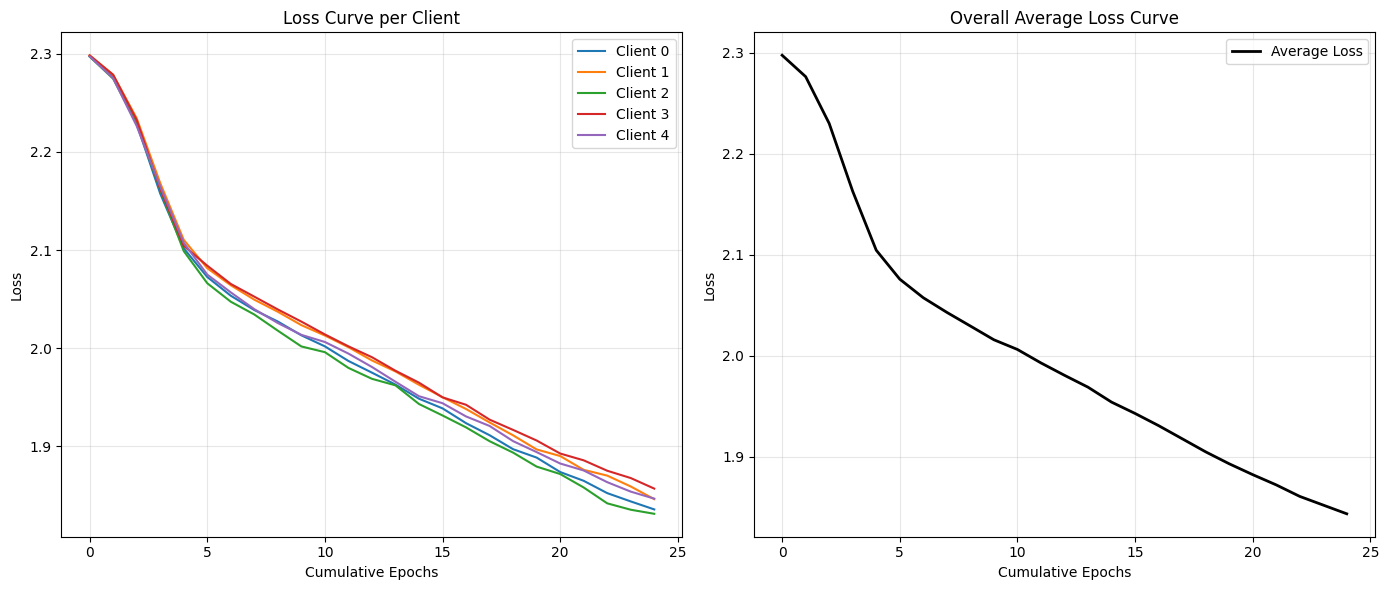

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

# Load the history file saved by the server
results_file = 'fl_results.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as f:
        history = pickle.load(f)

    # Plotting
    plt.figure(figsize=(14, 6))

    # Subplot 1: Individual Client Losses
    plt.subplot(1, 2, 1)
    all_losses = []
    for client_id in sorted(history.keys()):
        losses = history[client_id]
        all_losses.append(losses)
        plt.plot(losses, label=f'Client {client_id}')

    plt.title('Loss Curve per Client')
    plt.xlabel('Cumulative Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 2: Overall Average Loss
    plt.subplot(1, 2, 2)
    # Determine minimum length to average safely
    if all_losses:
        min_len = min(len(l) for l in all_losses)
        # Truncate to min_len and compute mean
        truncated_losses = [l[:min_len] for l in all_losses]
        avg_losses = np.mean(truncated_losses, axis=0)

        plt.plot(avg_losses, label='Average Loss', color='black', linewidth=2)
        plt.title('Overall Average Loss Curve')
        plt.xlabel('Cumulative Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print(f"File {results_file} not found. Please run the training cell first.")

# 課題1

精度を改善してみよう

# 課題2

途中でダイナミックにクライアントが追加・削除するように修正してみよう